# 00 Data Crawling - Google Trends

References

- https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f (Tanu)

- https://medium.com/the-data-science-publication/how-to-use-the-pytrends-api-to-get-google-trends-data-4378acbaaa8a  ( Mr Data Science)

- https://oralytics.com/2020/11/09/exploring-database-trends-using-python-pytrends-google-trends/ 
- https://newsinitiative.withgoogle.com/training/lessons?tool=Google%20Trends&image=trends
- https://pypi.org/project/pytrends/#common-api-parameters

# FAQ about Google Trends data

- Google Trends provides access to a largely **unfiltered sample of actual search requests** made to Google. 
- It’s anonymized (no one is personally identified), categorized (determining the topic for a search query) and aggregated (grouped together). 
- This allows us to **display interest in a particular topic** from around the globe or down to city-level geography.

Google Trends does filter out some types of searches, such as:

- Searches made by very few people: Trends only shows data for popular terms, so search terms with low volume appear as "0"

- Duplicate searches: Trends eliminates repeated searches from the same person over a short period of time.

- Special characters: Trends filters out queries with apostrophes and other special characters

# Compare Terms and Topics

**Terms**
- Search terms show **matches for all terms** in your query, in the language given.
- If you search the term "banana," results include terms like "banana" or "banana sandwich"
- If you specify "banana sandwich," results include searches for "banana sandwich," as well as "banana for lunch" and "peanut butter sandwich"

**Topics**

Topics are a **group of terms that share the same concept in any language**. Topics display below search terms.

- If you search the topic "London," your search includes results for topics such as:

-  "Capital of the UK"
-  "Londres," which is "London" in Spanish

- Topics are generally considered to be more reliable for Google Trends data. They pull in the exact phrase as well as misspellings and acronyms, and cover all languages. This is more useful, particularly when looking at world data.


- You can explore up to five topics or terms on the Trends Explore tool. Make sure you compare like for like -- topics should be compared with other topics, and search terms should be compared with other search terms.


# Understanding the numbers

- Indexing:
Google Trends data is pulled from a random, unbiased sample of Google searches, which means we don’t have exact numbers for any terms or topics. In order to give a value to terms, we index data from 1-100, where 100 is the maximum search interest for the time and location selected.

- Normalization:
When we look at search interest in a topic or query, we are not looking at the total number of searches. Instead, we look at the **percentage of searches for that topic, as a proportion of all searches at that time and location**.

Google Trends normalizes search data to make comparisons between terms easier. Search results are normalized to the time and location of a query by the following process:

- Each data point is divided by the total searches of the geography and time range it represents to **compare relative popularity**. Otherwise, places with the most search volume would always be ranked highest.

- The resulting numbers are then **scaled on a range of 0 to 100 based on a topic’s proportion to all searches on all topics**.

- Different regions that show the same search interest for a term don't always have the same total search volumes.


**Relative Search Volume**

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. 

#### Connecting to Google API

In [ ]:
!pip install pytrends

In [1]:
#import pandas module
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq 

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US',tz=360)

# build list of keywords
kw_list = ["Coronavirus","covid-19","covid19","covid","COVID-19"]
 
#build the payload
pytrends.build_payload(kw_list, timeframe='2019-12-01 2021-09-30' ,geo='MY')

# Daily Search Trends

Daily Search Trends highlights searches that jumped significantly in traffic among all searches over the past 24 hours, and updates hourly. These search trends show the specific queries that were searched, and the absolute number of searches made.

In [2]:
pytrends.trending_searches(pn='malaysia') # trending daily searches


,0
0,Sports
1,Aston Villa
2,Newcastle vs Brentford
3,Fiorentina vs Milan
4,Aguero
5,Real Madrid
6,Atlético Madrid vs Osasuna
7,Melaka election
8,Malaysiakini
9,Leicester City vs Chelsea


# Top Charts

Trending Searches highlights queries that jumped significantly in traffic among all searches over the past 24 hours, whereas Top Charts highlights topics with high overall search volume for that month.

In [3]:
## see what was tredning in 2020
# get Google Top Charts
df = pytrends.top_charts(2020, hl='en-US', tz=360, geo='MY')
print(df)


                             title               exploreQuery
0                US Elections 2020                           
1                 Google Classroom                           
2  Bantuan Prihatin Nasional (BPN)  Bantuan Prihatin Nasional
3         Bantuan Sara Hidup (BSH)         Bantuan Sara Hidup
4                      Coronavirus                           
5                        i lestari                           
6    Realme 6 Pro Reviews Malaysia                           
7     English Premier League (EPL)     English Premier League
8                      Google Meet                           
9                          Mysalam                           


# 1.0 Interest Over Time

Numbers on the graph don't represent absolute search volume 
numbers, because the data is normalized and presented on a 
scale from 0–100, where each point on the graph is divided by 
the highest point, or 100. The numbers next to the search 
terms at the top of the graph are summaries, or totals.

A line trending downward means that a search term's relative 
popularity is decreasing—not necessarily that the total number 
of searches for that term is decreasing, but that its popularity 
compared to other searches is shrinking.

            Coronavirus  covid-19  covid19  covid  COVID-19
date                                                       
2019-12-01            0         0        0      0         0
2019-12-08            0         0        0      0         0
2019-12-15            0         0        0      0         0
2019-12-22            0         0        0      0         0
2019-12-29            0         0        0      0         0
2020-01-05            0         0        0      0         0
2020-01-12            0         0        0      0         0
2020-01-19            9         0        0      0         0
2020-01-26           34         0        0      0         0
2020-02-02           26         0        0      0         0
2020-02-09           24         1        0      2         1
2020-02-16           13         1        1      4         1
2020-02-23           12         1        0      6         1
2020-03-01           18         2        2     18         2
2020-03-08           30         4       

Text(0, 0.5, 'Trends Index')

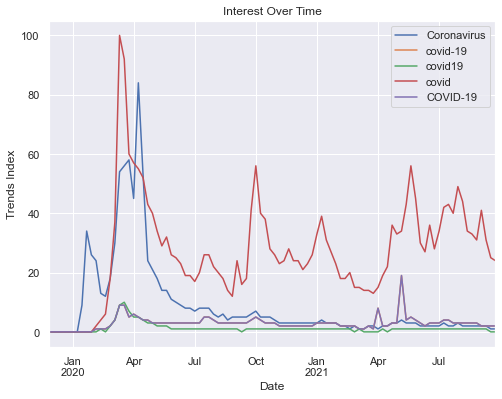

In [4]:
#Interest over time
df_iot = pd.DataFrame(pytrends.interest_over_time()).drop(columns='isPartial')

print(df_iot.head(20))
#print(df_iot.to_csv('interest_over_time.csv'))

#Data Visualisation
sns.set() 
dx = df_iot.plot.line(figsize=(8,6),title=("Interest Over Time"))
dx.set_xlabel('Date') 
dx.set_ylabel('Trends Index')


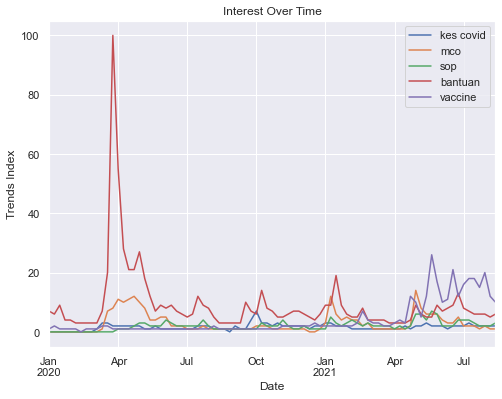

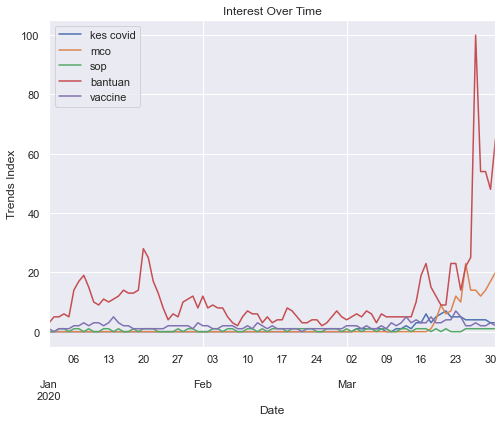

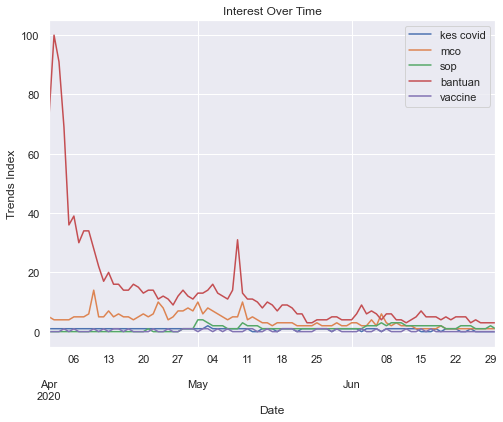

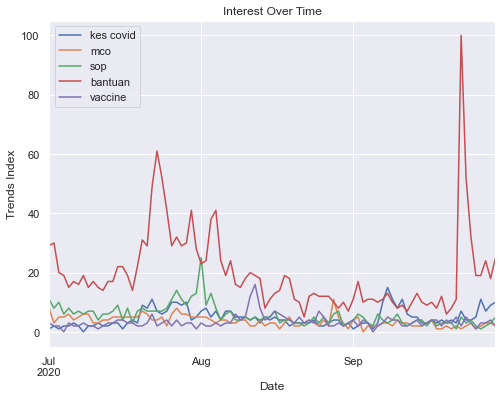

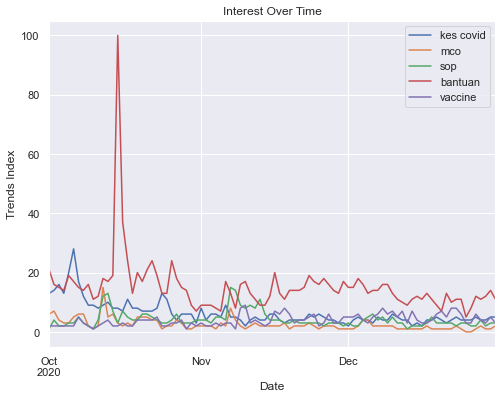

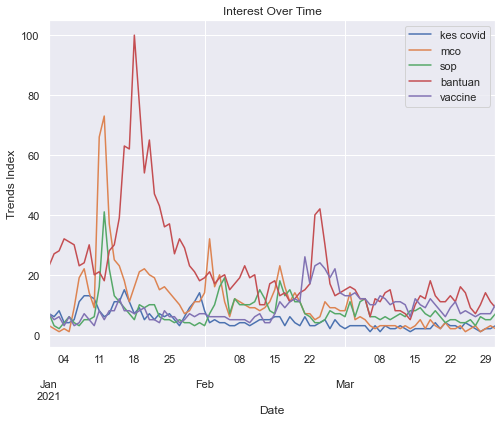

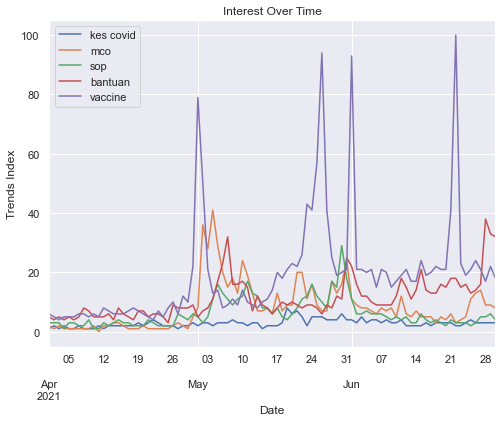

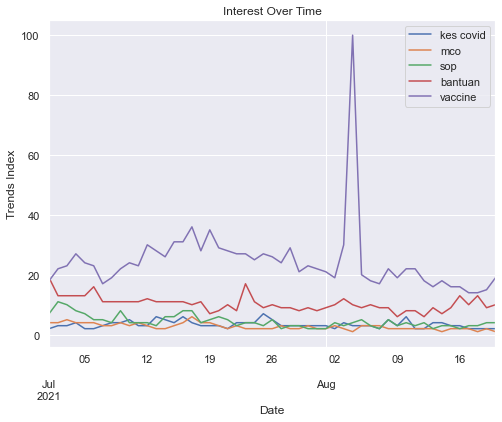

In [5]:
#using for loop 

from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns 

plt.style.use('ggplot')

# build list of keywords
#all_keywords = ["Coronavirus","covid-19","covid19","covid","COVID-19"]
all_keywords = ["kes covid","mco","sop", "bantuan","vaccine"]

# timeframes = ['today 5-y', 'today 12-m',
#               'today 3-m', 'today 1-m','2020-01-01 2021-08-20']

timeframes = ['2020-01-01 2021-08-20','2020-01-01 2020-03-31', '2020-04-01 2020-06-30', '2020-07-01 2020-09-30','2020-10-01 2020-12-31',
              '2021-01-01 2021-03-31', '2021-04-01 2021-06-30', '2021-07-01 2021-08-20']
cat = '0'
geo = 'MY'
gprop = ''

for period in range(len(timeframes)):

    pytrends.build_payload(all_keywords,
                          cat,timeframes[period],
                          geo,gprop)

    data = pytrends.interest_over_time()
    #print(data)
    sns.set() 
    ax1 = data.plot.line(figsize=(8,6),title=("Interest Over Time"))
    ax1.set_xlabel('Date') 
    ax1.set_ylabel('Trends Index')
       
    plt.show()
  



# 2.0 Interest by Region

When you search for a term in Google Trends, you see a map showing areas where your term is popular. Darker shades indicate where your term has a higher probability of being searched.

If you compare search terms, you see a map of the world shaded according to the term’s popularity. 
- The **color intensity represents the percentage of searches for the leading search term in a particular region**. 
- Search term popularity is **relative to the total number of Google searches performed at a specific time, in a specific location**.

                                   kes covid  mco  sop  bantuan  vaccine
geoName                                                                 
Federal Territory of Kuala Lumpur          5    7    9       18       61
Johor                                      8    5    7       25       55
Kedah                                     21    3    5       35       36
Kelantan                                  24    1    8       41       26
Labuan Federal Territory                   6    3    9       46       36
Malacca                                    9    5    8       32       46
Negeri Sembilan                            6    5   10       26       53
Pahang                                    18    4   12       31       35
Penang                                     4    4    9       13       70
Perak                                     12    3    8       27       50


Text(0, 0.5, 'Relative Search Volume')

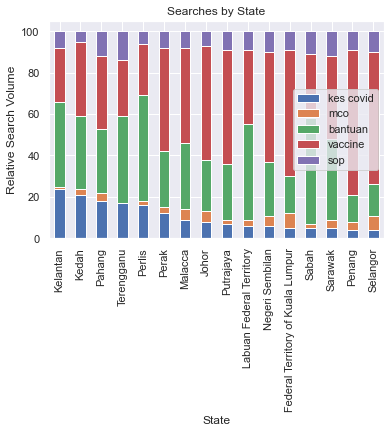

In [7]:
#Interest By Region
df_region = pytrends.interest_by_region(resolution="Malaysia")

print(df_region.head(10))
#df_region.sort_values('covid19',asecending=False).head(10)

#visualisation
df2 = df_region.sort_values('kes covid', ascending=False).head(20)

df2.reset_index().plot(x='geoName', y= ["kes covid","mco","bantuan","vaccine","sop"], kind ='bar', stacked=True, title="Searches by State")

plt.rcParams["figure.figsize"] = [20, 8]
plt.xlabel("State")
plt.ylabel("Relative Search Volume")

# 3.0 Related Topics

**Top searches** are terms that are 
- most frequently searched with the term you entered in the same search session, within the chosen category, country, or region. 
- If you didn't enter a search term, top searches overall are shown.


**Rising searches** are terms that were 
- searched for with the keyword you entered (or overall searches, if no keyword was entered), which had the most significant growth in volume in the requested time period. 
- For each rising search term, you see a percentage of the term’s growth compared to the previous time period. 
- If you see “Breakout” instead of a percentage, it means that the search term grew by more than 5000%.Usually these are new, or had very low search volume before.

The percentages are based on the percent increase in search 
interest for the selected time frame. If we're looking at the last 
7 days, the benchmark for the rise in searches for the term 
“zika virus” would be 7 days prior; if it was the last 30 days, the 
benchmark would be for the 30 days prior. The only exception 
is when viewing the full history (2004–Present), when the 
percentages are benchmarked at 2004.


In [8]:
#related topics final code
# can only use single keyword

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US')

all_keywords = ["vaccine"]


#MCO period
# timeframes = ['2020-03-18 2020-05-03', '2020-05-04 2020-06-09', '2020-06-10 2021-05-31',
#               '2021-06-01 2021-06-28', '2021-06-15 2021-08-18']

# 2020,2021 quarter
timeframes = ['2020-01-01 2020-03-31', '2020-04-01 2020-06-30', '2020-07-01 2020-09-30','2020-10-01 2020-12-31',
              '2021-01-01 2021-03-31', '2021-04-01 2021-06-30', '2021-07-01 2021-09-30']


cat = '0'
geo = 'MY'
gprop = ''

for kw in all_keywords:
    for period in range(len(timeframes)):
            
        pytrends.build_payload(all_keywords,
                          cat,timeframes[period],
                          geo,gprop)
            
        #print related topic
        rt = pytrends.related_topics()
            
             
        #print top query
        print(kw + ' top topics:')
        if rt[kw]['top'] is None:
            print('There isn\'t enough data.')
        else:
            top_t = rt[kw]['top'][["value","topic_title","topic_type"]]
            
        if period == 0:
            top_concat = top_t
        else:
            top_concat = pd.concat([top_concat,top_t], axis = 1)
            print(top_concat)
            
        #print rising query
        print(kw + ' rising topic:')
        if rt[kw]['rising'] is None:
                print('There isn\'t enough data.')
        else:
            rising_t = rt[kw]['rising'][["value","topic_title","topic_type"]]
            
        if period == 0:
            rise_concat = rising_t
        else:
            rise_concat = pd.concat([rise_concat,rising_t], axis = 1)
            print(rise_concat)
               

top_concat.to_csv("rtopic_top_qtr_malaysia.csv")  
rise_concat.to_csv("rtopic_rise_qtr_malaysia.csv")


vaccine top topics:
vaccine rising topic:
vaccine top topics:
    value                        topic_title        topic_type  value  \
0     100                            Vaccine             Topic    100   
1      32                        Coronavirus             Virus     48   
2      31                   COVID-19 vaccine           Vaccine     43   
3      25                  Influenza vaccine           Vaccine     41   
4      24                          Influenza           Disease      5   
5      14           Coronavirus disease 2019           Disease      4   
6       7                              Virus  Infectious agent      4   
7       5               Pneumococcal vaccine           Vaccine      4   
8       4             Pneumococcal infection           Disease      3   
9       4                              Polio           Disease      3   
10      4                        Hepatitis B           Disease      3   
11      3  Severe acute respiratory syndrome           Disease

vaccine top topics:
    value                        topic_title        topic_type  value  \
0     100                            Vaccine             Topic    100   
1      32                        Coronavirus             Virus     48   
2      31                   COVID-19 vaccine           Vaccine     43   
3      25                  Influenza vaccine           Vaccine     41   
4      24                          Influenza           Disease      5   
5      14           Coronavirus disease 2019           Disease      4   
6       7                              Virus  Infectious agent      4   
7       5               Pneumococcal vaccine           Vaccine      4   
8       4             Pneumococcal infection           Disease      3   
9       4                              Polio           Disease      3   
10      4                        Hepatitis B           Disease      3   
11      3  Severe acute respiratory syndrome           Disease      3   
12      3                    Te

vaccine top topics:
    value                        topic_title        topic_type  value  \
0     100                            Vaccine             Topic    100   
1      32                        Coronavirus             Virus     48   
2      31                   COVID-19 vaccine           Vaccine     43   
3      25                  Influenza vaccine           Vaccine     41   
4      24                          Influenza           Disease      5   
5      14           Coronavirus disease 2019           Disease      4   
6       7                              Virus  Infectious agent      4   
7       5               Pneumococcal vaccine           Vaccine      4   
8       4             Pneumococcal infection           Disease      3   
9       4                              Polio           Disease      3   
10      4                        Hepatitis B           Disease      3   
11      3  Severe acute respiratory syndrome           Disease      3   
12      3                    Te

vaccine top topics:
    value                        topic_title        topic_type  value  \
0     100                            Vaccine             Topic    100   
1      32                        Coronavirus             Virus     48   
2      31                   COVID-19 vaccine           Vaccine     43   
3      25                  Influenza vaccine           Vaccine     41   
4      24                          Influenza           Disease      5   
5      14           Coronavirus disease 2019           Disease      4   
6       7                              Virus  Infectious agent      4   
7       5               Pneumococcal vaccine           Vaccine      4   
8       4             Pneumococcal infection           Disease      3   
9       4                              Polio           Disease      3   
10      4                        Hepatitis B           Disease      3   
11      3  Severe acute respiratory syndrome           Disease      3   
12      3                    Te

vaccine top topics:
   value                        topic_title        topic_type value  \
0    100                            Vaccine             Topic   100   
1     32                        Coronavirus             Virus    48   
2     31                   COVID-19 vaccine           Vaccine    43   
3     25                  Influenza vaccine           Vaccine    41   
4     24                          Influenza           Disease     5   
5     14           Coronavirus disease 2019           Disease     4   
6      7                              Virus  Infectious agent     4   
7      5               Pneumococcal vaccine           Vaccine     4   
8      4             Pneumococcal infection           Disease     3   
9      4                              Polio           Disease     3   
10     4                        Hepatitis B           Disease     3   
11     3  Severe acute respiratory syndrome           Disease     3   
12     3                    Tetanus vaccine           Vac

# 4.0 Related Queries

# 4.1.1 Related queries 2020 by quarter 

In [9]:
#Use this
#related queries 2020 by quarter
# repeat for 4 Quarters
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US')

# all_keywords = ["coronavirus","covid-19","covid19","covid"]
all_keywords = ["kes covid","mco","bantuan","vaksin","sop"]

#repeat for 4 Quarters from Q12020 - Q42020
#timeframes = ['2020-01-01 2020-03-31', '2020-04-01 2020-06-30', '2020-07-01 2020-09-30', '2020-10-01 2020-12-31' ]

timeframes = ['2020-10-01 2020-12-31']


cat = '0'
geo = 'MY'
gprop = ''

for kw in all_keywords:
    for period in range(len(timeframes)):
            
            pytrends.build_payload(all_keywords,
                               cat,
                               timeframes[period],
                               geo,
                               gprop)

            data = pytrends.related_queries()
             
            #print top query
            print(kw + ' top queries:')
            if data[kw]['top'] is None:
                print('There isn\'t enough data.')
            else:
                top_q = data[kw]['top'].head(25)
            
            if period == 0:
                top_concat = top_q
            else:
                top_concat = pd.concat([top_concat,top_q], axis = 0)
            print(top_concat)
            
            #print rising query
            print(kw + ' rising queries:')
            if data[kw]['rising'] is None:
                print('There isn\'t enough data.')
            else:
                rising_q = data[kw]['rising'].head(25)
            
            if period == 0:
                rise_concat = rising_q
            else:
                rise_concat = pd.concat([rise_concat,rising_q], axis = 0)
            print(rise_concat)
            
    
           
    #TOP   
    if kw == all_keywords[0]:
        top_k = top_concat
    else:
        top_k = pd.concat([top_concat,top_k,], axis = 1)
    
    #RISING
    if kw == all_keywords[0]:
        rise_k = rise_concat
    else:
        rise_k = pd.concat([rise_concat,rise_k],axis=1)
        

top_k_col = top_k.set_axis(['topic 0','topic 0_V','topic 1','topic 1_V','topic 2','topic 2_V','topic 3','topic 3_V','topic 4','topic 4_V'], axis=1)
rise_k_col = rise_k.set_axis(['topic 0','topic 0_V','topic 1','topic 1_V','topic 2','topic 2_V','topic 3','topic 3_V','topic 4','topic 4_V'], axis=1)
        
#output each quarterly top queries and rise search queries       
top_k_col.to_csv("GT20Q4_top_new.csv")
rise_k_col.to_csv("GT20Q4_rise_new.csv")

kes covid top queries:
                             query  value
0                     kes covid 19    100
1                kes covid terkini     96
2               kes covid hari ini     91
3               kes covid malaysia     67
4             kes covid 19 terkini     42
5               kes covid selangor     32
6            kes covid 19 malaysia     28
7      kes covid hari ini malaysia     22
8       kes covid terkini malaysia     22
9            kes covid 19 hari ini     20
10           kes covid di malaysia     20
11                 kes covid johor     17
12           kes covid di selangor     17
13  covid 19 malaysia kes hari ini     14
14   kes covid 19 terkini malaysia     13
15                 kes covid sabah     11
16              kes covid di johor     10
17               kes terbaru covid     10
18   kes covid terkini di malaysia      8
19              kes covid di perak      8
20         kes baru covid hari ini      7
21              kes covid di kedah      7
22       ju

# 4.1.2 Related queries 2021 by quarter

In [10]:
#Use this
#related queries 2021 by quarter
# repeat for 3 Quarters
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US')

# all_keywords = ["coronavirus","covid-19","covid19","covid"]
all_keywords = ["kes covid","mco","bantuan","vaksin","sop"]


#repeat for 3 Quarters from Q12021 - Q32021
#timeframes = ['2020-01-01 2020-03-31', '2020-04-01 2020-06-30', '2020-07-01 2020-09-30', '2020-10-01 2020-12-31']

timeframes = ['2021-07-01 2021-09-30']

cat = '0'
geo = 'MY'
gprop = ''

for kw in all_keywords:
    for period in range(len(timeframes)):
            
            pytrends.build_payload(all_keywords,
                               cat,
                               timeframes[period],
                               geo,
                               gprop)

            data = pytrends.related_queries()
             
            #print top query
            print(kw + ' top queries:')
            if data[kw]['top'] is None:
                print('There isn\'t enough data.')
            else:
                top_q = data[kw]['top'].head(25)
            
            if period == 0:
                top_concat = top_q
            else:
                top_concat = pd.concat([top_concat,top_q], axis = 0)
            print(top_concat)
            
            #print rising query
            print(kw + ' rising queries:')
            if data[kw]['rising'] is None:
                print('There isn\'t enough data.')
            else:
                rising_q = data[kw]['rising'].head(25)
            
            if period == 0:
                rise_concat = rising_q
            else:
                rise_concat = pd.concat([rise_concat,rising_q], axis = 0)
            print(rise_concat)
            
    
           
    #TOP   
    if kw == all_keywords[0]:
        top_k = top_concat
    else:
        top_k = pd.concat([top_concat,top_k,], axis = 1)
    
    #RISING
    if kw == all_keywords[0]:
        rise_k = rise_concat
    else:
        rise_k = pd.concat([rise_concat,rise_k],axis=1)
        
top_k_col = top_k.set_axis(['topic 0','topic 0_V','topic 1','topic 1_V','topic 2','topic 2_V','topic 3','topic 3_V','topic 4','topic 4_V'], axis=1)
rise_k_col = rise_k.set_axis(['topic 0','topic 0_V','topic 1','topic 1_V','topic 2','topic 2_V','topic 3','topic 3_V','topic 4','topic 4_V'], axis=1)
        
        
#output each quarterly top search queries and rise search queries       
top_k_col.to_csv("GT21Q3_top_new.csv")
rise_k_col.to_csv("GT21Q3_rise_new.csv")

kes covid top queries:
                             query  value
0               kes covid hari ini    100
1                kes covid terkini     35
2               kes covid malaysia     33
3             kes covid 19 terkini     15
4      kes covid malaysia hari ini     13
5            kes covid 19 malaysia     12
6        kes covid mengikut negeri     11
7                  kes covid kedah      9
8                 kes harian covid      9
9            kes covid 19 hari ini      8
10              kes covid di perak      6
11              kes covid di kedah      6
12     kes covid hari ini selangor      5
13             kes covid indonesia      4
14  covid 19 malaysia kes hari ini      4
15        kes covid hari ini kedah      4
16           kes covid di kelantan      4
17                 kes covid dunia      4
18         kes baru covid hari ini      3
19             kes covid di pahang      3
20     kes kematian covid hari ini      2
21       jumlah kes covid hari ini      2
22     kes 

# Visualisation on Google Trends Topic Words

In [11]:
import pandas as pd
GT_topic_df = pd.read_csv("Data/GT_FB_Document_Similarity.csv",index_col=0)
GT_topic_df


,Period,GT,FB,wmdistance
0,2020_Q1,"tatacara, kendali, piawai, makna, bahagian, ha...","siar_sidang, media, yaakob, ismail_sabri, taha...",3.060240
1,2020_Q2,"tatacara, kendali, piawai, malaysia, pkpb, cov...","menteri, jabat, malaysia, tatacara, piawai, ke...",3.267527
2,2020_Q3,"tatacara, kendali, piawai, malaysia, pkpp, mak...","kendali, tatacara, piawai, malaysia, tugas, me...",3.347879
3,2020_Q4,"tatacara, kendali, piawai, pkpb, cmco, mkn, ma...","kes, kluster, covid, pulih, negeri, saring, at...",3.005843
4,2021_Q1,"tatacara, kendali, piawai, malaysia, mco, miti...","kes, kluster, mati, kumulatif, covid, malaysia...",2.858314
5,2021_Q2,"tatacara, kendali, piawai, mco, sarawak, tatac...","vaccination, daftar, dos, vaksin, vaksinasi, d...",3.318979
6,2021_Q3,"tatacara, kendali, piawai, mkn, fasa, pkp, pk...","vaksin, do, julai, tamat, dos, kategori, tadbi...",3.013693


In [12]:
#Make tokens a string again
# use it to pass into wordcloud
GT_topic_df['GT_topic_text'] = [''.join(map(str, l)) for l in GT_topic_df['GT']]
print(GT_topic_df[['GT_topic_text']])

                                       GT_topic_text
0  tatacara, kendali, piawai, makna, bahagian, ha...
1  tatacara, kendali, piawai, malaysia, pkpb, cov...
2  tatacara, kendali, piawai, malaysia, pkpp, mak...
3  tatacara, kendali, piawai, pkpb, cmco, mkn, ma...
4  tatacara, kendali, piawai, malaysia, mco, miti...
5  tatacara, kendali, piawai, mco, sarawak, tatac...
6  tatacara, kendali, piawai, mkn,  fasa, pkp, pk...


In [14]:
from wordcloud import WordCloud, STOPWORDS

# String together cleaned tokens from tweets
words_list = ' '.join(GT_topic_df['GT_topic_text']) 
stopwords = set(STOPWORDS)

# Word cloud configuration
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words_list)

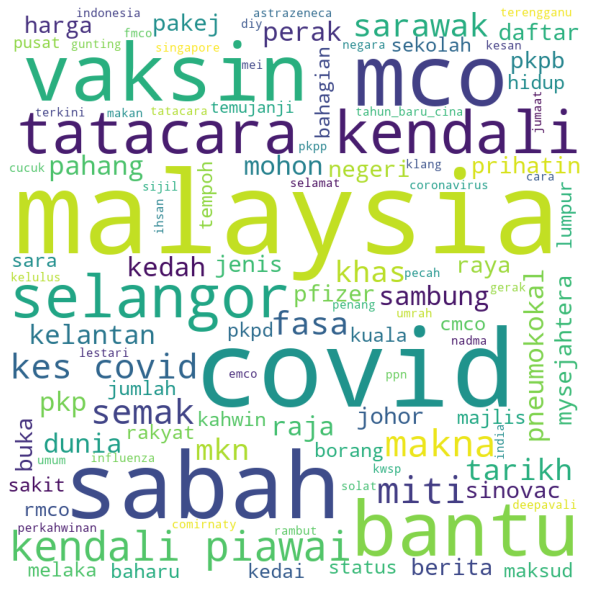

In [15]:
import matplotlib.pyplot as plt
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [16]:
words_in_GT = [GT.lower().split(', ') for GT in GT_topic_df['GT']]
words_in_GT

[['tatacara',
  'kendali',
  'piawai',
  'makna',
  'bahagian',
  'harga',
  'vaksin',
  'influenza',
  'pneumokokal',
  'covid',
  'harga',
  'vaksin',
  'umrah',
  'coronavirus',
  'bantu',
  'covid',
  ' khas',
  'borang',
  'sara',
  'hidup',
  'raja',
  'malaysia',
  'mco',
  'makna',
  'rmco',
  ' sambung',
  'maksud',
  'kes',
  'covid',
  'malaysia',
  'terkini',
  'jumlah\n'],
 ['tatacara',
  'kendali',
  'piawai',
  'malaysia',
  'pkpb',
  'covid',
  'miti',
  'makna',
  'maksud',
  'malaysia',
  'raya',
  'kedai',
  'makan',
  'kedai',
  'gunting',
  'rambut',
  'buka',
  'sekolah',
  'fasa',
  'mco',
  'vaksin',
  'covid',
  'bantu',
  'covid',
  'sabah',
  'semak',
  'bantu',
  'mohon ,sara',
  'hidup',
  'pakej',
  'bantu',
  'negeri',
  'johor',
  'pakej',
  'khas',
  'lestari',
  'kwsp',
  'borang',
  'gerak',
  'malaysia',
  'raja',
  'ihsan',
  'mco',
  'malaysia',
  'miti',
  'makna',
  'sambung',
  'pkp',
  'mohon',
  'umum',
  'berita',
  'miti',
  'kelulus',
  'fa

In [17]:
import itertools
from itertools import permutations, combinations
import collections

In [18]:
# List of all words across tweets
all_words_GT_topic = list(itertools.chain(*words_in_GT))

# Create counter
counts_word_freq = collections.Counter(all_words_GT_topic)

counts_word_freq.most_common(30)

[('covid', 27),
 ('malaysia', 24),
 ('sabah', 15),
 ('mco', 13),
 ('tatacara', 11),
 ('vaksin', 11),
 ('kendali', 10),
 ('piawai', 10),
 ('bantu', 10),
 ('selangor', 10),
 ('makna', 8),
 ('miti', 8),
 ('kes', 7),
 ('semak', 7),
 ('fasa', 5),
 ('mkn', 5),
 ('tarikh', 5),
 ('pneumokokal', 4),
 ('raja', 4),
 ('khas', 4),
 ('pkp', 4),
 ('dunia', 4),
 ('kedah', 4),
 ('perak', 4),
 ('kelantan', 4),
 ('pahang', 4),
 ('sarawak', 4),
 ('harga', 3),
 ('pkpb', 3),
 ('raya', 3)]

In [19]:
GT_topic = pd.DataFrame(counts_word_freq.most_common(50),
                             columns=['words', 'count'])

GT_topic

,words,count
0,covid,27
1,malaysia,24
2,sabah,15
3,mco,13
4,tatacara,11
5,vaksin,11
6,kendali,10
7,piawai,10
8,bantu,10
9,selangor,10


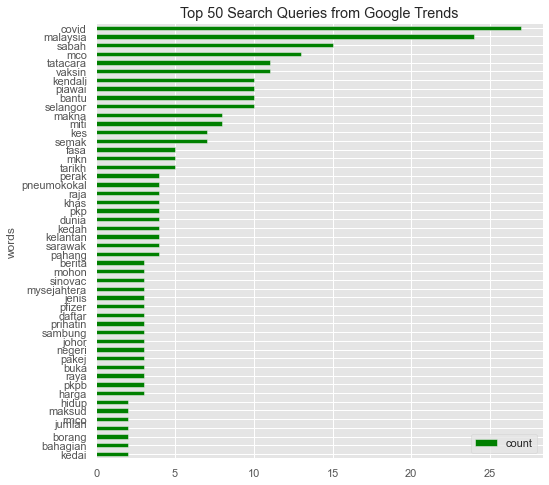

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
GT_topic.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Top 50 Search Queries from Google Trends")

plt.show()